In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [213]:
df=pd.read_csv('/Users/celty/Desktop/MBAN 6110/Assignment 3/kc_house_data.csv')

In [214]:
check_na=df.isnull().any().any()
if check_na:
    print('True')
else:
    print('False')

#No N/A data exists.

False


In [215]:
check_dp=df.duplicated().any().any()
if check_dp:
    print('True')
else:
    print('False')

#No duplicates.

False


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [217]:
df.describe(include='all')
#Check the mean, std, min, and max of every attributes, it seems that "bedrooms" and "sqft_living" have abnormal or inexplainable numbers.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


<Axes: >

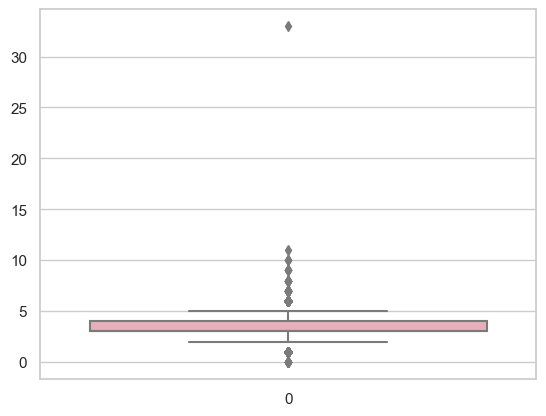

In [218]:
#Check outliers for # of bedrooms.
sns.boxplot(df['bedrooms'],color='#F0A6B3')

In [219]:
#Find the outliers and drop it.
df.sort_values(['bedrooms'], ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751


In [220]:
df=df.drop([15870,8477,9773])

<Axes: >

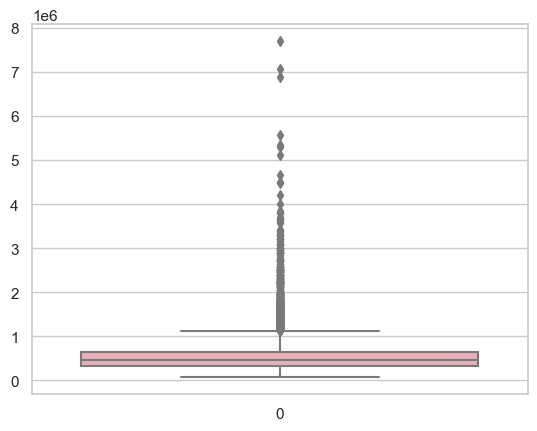

In [221]:
#Check outliers for price.
sns.boxplot(df['price'],color='#F0A6B3')
#Due the the extreme luxury value that may influence the model too much, the top three outliers can be removed.

In [222]:
#Find the outliers to check.
df.sort_values(['sqft_living'], ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000


In [223]:
df=df.drop([12777,7252,3914])

<Axes: >

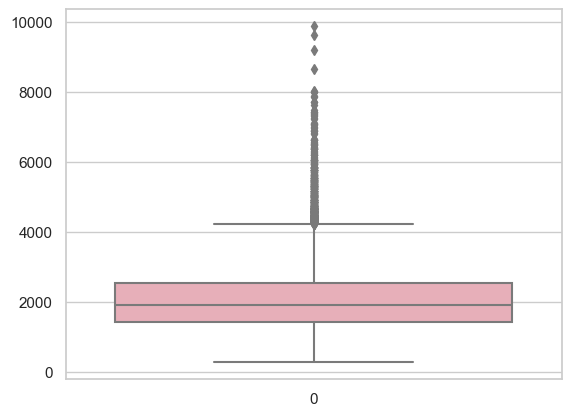

In [224]:
#Check outliers for sqft_living.
sns.boxplot(df['sqft_living'],color='#F0A6B3')

In [225]:
#Find the outliers to check.
df.sort_values(['sqft_living'], ascending=False)
#The outliers seem acceptable when taking into account the number of bedrooms, bathrooms, the size of the lot area, and the view and the grade. 
#Also, checked the sizes of sqft_living that are equal addition of sqft_above & sqft_basement for outlier examination.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
14556,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
18302,6072800246,20140702T000000,3300000.0,5,6.25,8020,21738,2.0,0,0,...,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21607 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21607 non-null  int64  
 1   date           21607 non-null  object 
 2   price          21607 non-null  float64
 3   bedrooms       21607 non-null  int64  
 4   bathrooms      21607 non-null  float64
 5   sqft_living    21607 non-null  int64  
 6   sqft_lot       21607 non-null  int64  
 7   floors         21607 non-null  float64
 8   waterfront     21607 non-null  int64  
 9   view           21607 non-null  int64  
 10  condition      21607 non-null  int64  
 11  grade          21607 non-null  int64  
 12  sqft_above     21607 non-null  int64  
 13  sqft_basement  21607 non-null  int64  
 14  yr_built       21607 non-null  int64  
 15  yr_renovated   21607 non-null  int64  
 16  zipcode        21607 non-null  int64  
 17  lat            21607 non-null  float64
 18  long       

In [227]:
#Check the price distribution in a map format.
df.describe()
#Check the price on 25%, 50%, 75% percentiles.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,4.580364e+09,5.393876e+05,3.369417,2.114199,2078.533485,1.509288e+04,1.494145,0.007498,0.233952,3.409404,7.656269,1787.431758,291.101726,1971.007683,84.241126,98077.945943,47.560051,-122.213902,1986.221549,12759.341047
std,2.876534e+09,3.610175e+05,0.906927,0.767871,911.117767,4.137793e+04,0.539880,0.086265,0.765665,0.650707,1.174455,824.282745,441.094851,29.372290,401.312992,53.507788,0.138565,0.140834,684.919951,27272.083737
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471050,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,6.885000e+06,11.000000,7.750000,9890.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [228]:
df2=df.sort_values('price', ascending=True)

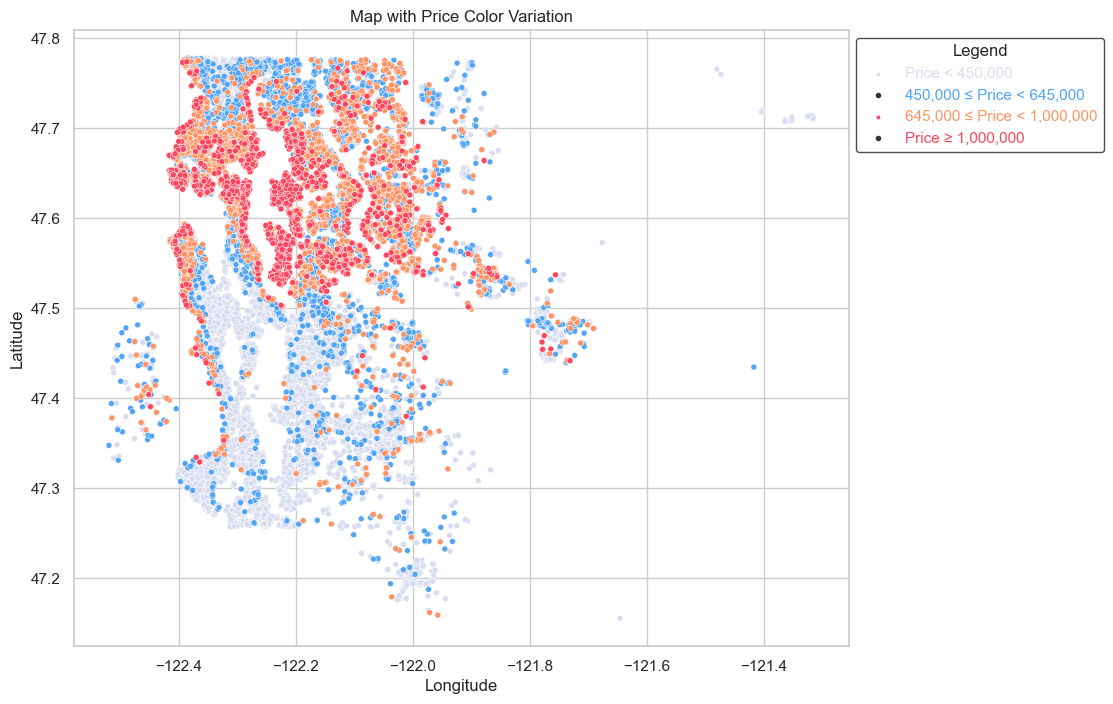

In [229]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=df, color='#D7DDEF', size=5, zorder=1)
sns.scatterplot(x='long', y='lat', data=df[df['price'] >= 1000000], color='#FD465D', size=5, zorder=4)
sns.scatterplot(x='long', y='lat', data=df[df['price'] >= 645000], color='#FF9364', size=5, zorder=3)
sns.scatterplot(x='long', y='lat', data=df[df['price'] >= 450000], color='#51A4F6', size=5, zorder=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map with Price Color Variation')
legend_text = ['Price < 450,000', '450,000 ≤ Price < 645,000', '645,000 ≤ Price < 1,000,000', 'Price ≥ 1,000,000']
legend_colors = ['#D7DDEF', '#51A4F6', '#FF9364', '#FD465D']
plt.legend(legend_text, title='Legend', loc='upper left', fancybox=True, facecolor='white', framealpha=0.7, edgecolor='black', markerscale=0.7, frameon=True, bbox_to_anchor=(1, 1), labelcolor=legend_colors)
plt.show()
#From the graph, we cen generally see a concentrated area with higher price, and waterfront seems very related to the house price.

From the graph, we cen generally see a concentrated area (near Seattle and Lake Washington) with higher price, and waterfront seems very related to the house price. Therefore, lattitude of 47.5 is a selected to seperate houses with higher price and lower price.

In [230]:
#Try to create a dummy related to region above latitude of 47.5 and below that of 47.5.
dummy=df[['lat']]


In [231]:
dummy

,lat
0,47.5112
1,47.7210
2,47.7379
3,47.5208
4,47.6168
...,...
21608,47.6993
21609,47.5107
21610,47.5944
21611,47.5345


In [232]:
dummy['region'] = np.where(dummy['lat'] <= 47.5, 0, 1)


/var/folders/05/d9ht8d1s3rs1ny1n4s1z1_zc0000gn/T/ipykernel_3617/1282666123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy['region'] = np.where(dummy['lat'] <= 47.5, 0, 1)


In [233]:
dummy.head(30)

,lat,region
0,47.5112,1
1,47.7210,1
2,47.7379,1
3,47.5208,1
4,47.6168,1
5,47.6561,1
6,47.3097,0
7,47.4095,0
8,47.5123,1
9,47.3684,0


In [234]:
df = pd.concat([df,dummy['region']], axis=1)

In [235]:
df.head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,region
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,1
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0


In [236]:
#Try OLS to see if R and Adj. R has a good score that represents the relvance between region and price.
results = ols("price ~ region", data=df).fit()
print(results.summary())
#The result seems good and may apply region in OLS.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     3681.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:49:58   Log-Likelihood:            -3.0546e+05
No. Observations:               21607   AIC:                         6.109e+05
Df Residuals:                   21605   BIC:                         6.109e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.319e+05   4105.261     80.840      0.0

In [237]:
results = ols("price ~ grade + sqft_living + yr_built + waterfront + region + bedrooms", data=df).fit()
print(results.summary())
#Try different comninations of explatory variables to seek for an ideal R-squared & an Adj. R-squared.
#Ultimately found the combination of six attributes to explain the price of the houses, with an Adj.R of 0.692.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     8143.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:49:58   Log-Likelihood:            -2.9438e+05
No. Observations:               21607   AIC:                         5.888e+05
Df Residuals:                   21600   BIC:                         5.888e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.312e+06   1.02e+05     42.294      

In [252]:
#Start to do the residual analysis.
"y_price = 4.312e+06 + 1.087e+05grade + 198.3355sqft_living - 2565.7681yr_built + 7.515e+05waterfront + 1.93e+05region - 2.978e+04bedrooms"

'y_price = 4.312e+06 + 1.087e+05grade + 198.3355sqft_living - 2565.7681yr_built + 7.515e+05waterfront + 1.93e+05region - 2.978e+04bedrooms'

In [239]:
df[['price','grade','sqft_living','yr_built','waterfront','region','bedrooms']].head()

,price,grade,sqft_living,yr_built,waterfront,region,bedrooms
0,221900.0,7,1180,1955,0,1,3
1,538000.0,7,2570,1951,0,1,3
2,180000.0,6,770,1933,0,1,2
3,604000.0,7,1960,1965,0,1,4
4,510000.0,8,1680,1987,0,1,3


In [253]:
y_price =4.312e+06 + 1.087e+05*7 + 198.3355*1180 - 2565.7681*1955 + 7.515e+05*0 + 1.93e+05*1 - 2.978e+04*3
y_price

394519.2544999998

In [254]:
pred_vals = results.predict(df[['grade', 'sqft_living', 'yr_built', 'waterfront','region', 'bedrooms']])

In [255]:
pred_vals

0        395283.245814
1        681232.641247
2        291448.912276
3        494550.420108
4        521086.913200
             ...      
21608    434889.691309
21609    546985.706350
21610    254774.910083
21611    461602.015939
21612    257340.678232
Length: 21607, dtype: float64

In [256]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_price'}),df['price']], axis=1)

In [257]:
res['error'] = res['y_price'] - res['price']

In [258]:
res.head(5)
#The first five differences showed below indicate a morderate acceptance of the model prediction.

,y_price,price,error
0,395283.245814,221900.0,173383.245814
1,681232.641247,538000.0,143232.641247
2,291448.912276,180000.0,111448.912276
3,494550.420108,604000.0,-109449.579892
4,521086.913200,510000.0,11086.913200


In [259]:
res['sq_error'] = res['error']**2

(array([1.0000e+00, 1.0000e+00, 1.0000e+00, 5.0000e+00, 1.8000e+01,
        8.7000e+01, 3.9600e+02, 1.6012e+04, 5.0610e+03, 2.5000e+01]),
 array([-4317127.45145529, -3763977.236555  , -3210827.02165471,
        -2657676.80675442, -2104526.59185414, -1551376.37695385,
         -998226.16205356,  -445075.94715327,   108074.26774702,
          661224.4826473 ,  1214374.69754759]),
 <BarContainer object of 10 artists>)

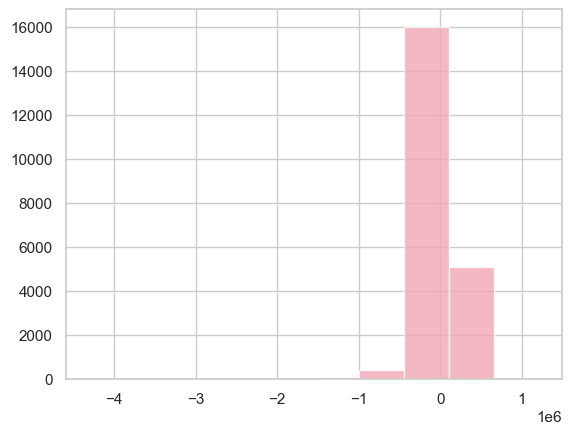

In [260]:
plt.hist(res['error'],color='#F0A6B3',alpha=0.8)

A majority of errors are concentrated near zero, which indicates a medium accuracy of the model. 
This also indicates that the model's predictive capability is weaker in extreme scenarios.

(array([1.8077e+04, 2.9390e+03, 4.0700e+02, 1.1900e+02, 4.5000e+01,
        1.1000e+01, 4.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  75000.,  756000., 1437000., 2118000., 2799000., 3480000.,
        4161000., 4842000., 5523000., 6204000., 6885000.]),
 <BarContainer object of 10 artists>)

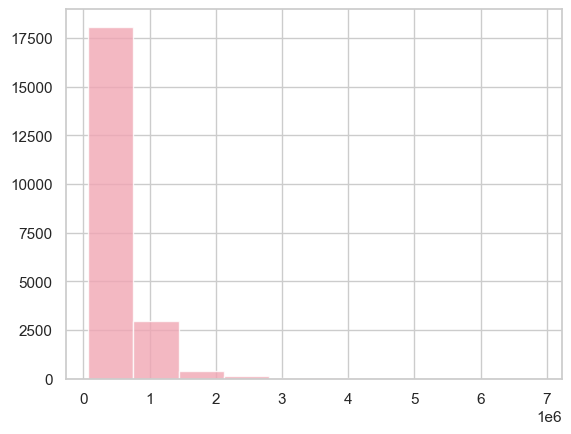

In [261]:
plt.hist(df['price'],color='#F0A6B3',alpha=0.8)

In [262]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,region
count,2.160700e+04,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,...,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,4.580364e+09,5.393876e+05,3.369417,2.114199,2078.533485,1.509288e+04,1.494145,0.007498,0.233952,3.409404,...,1787.431758,291.101726,1971.007683,84.241126,98077.945943,47.560051,-122.213902,1986.221549,12759.341047,0.694173
std,2.876534e+09,3.610175e+05,0.906927,0.767871,911.117767,4.137793e+04,0.539880,0.086265,0.765665,0.650707,...,824.282745,441.094851,29.372290,401.312992,53.507788,0.138565,0.140834,684.919951,27272.083737,0.460767
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471050,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,1.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068600e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000
max,9.900000e+09,6.885000e+06,11.000000,7.750000,9890.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


((array([-3.99696983, -3.78174326, -3.66401218, ...,  3.66401218,
          3.78174326,  3.99696983]),
  array([-4317127.45145529, -3256471.3458709 , -3109202.11367684, ...,
           984228.17295821,  1024124.96445933,  1214374.69754759])),
 (178960.72832395454, 8.650313599090707e-08, 0.8951708978972183))

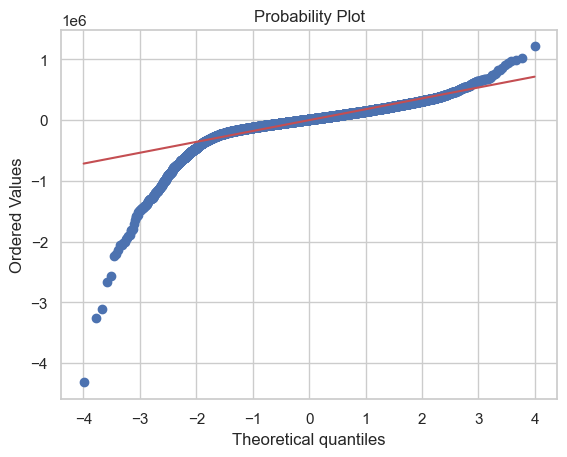

In [263]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

Most of the datapoints lie on the prediction model, indicating a relatively high accuracy in predictions of house prices.
However, some extreme values and outliers are hard to be predicted, that's why some datapoints fail to follow the predicted line.

In [264]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_grade  dfb_sqft_living  dfb_yr_built  \
0          -0.001024  -0.001657         0.005119      0.001062   
1          -0.002097   0.007678        -0.009328      0.001088   
2          -0.002645   0.001875        -0.000015      0.002080   
3          -0.000911  -0.002738        -0.000060      0.001052   
4           0.000247  -0.000220         0.000307     -0.000222   
...              ...        ...              ...           ...   
21608       0.003901  -0.001190         0.002748     -0.003688   
21609       0.008765   0.002381         0.001174     -0.008563   
21610      -0.009417  -0.002467        -0.001862      0.009732   
21611       0.002786  -0.000930         0.001983     -0.002631   
21612      -0.004234  -0.001099        -0.000859      0.004378   

       dfb_waterfront  dfb_region  dfb_bedrooms       cooks_d  standard_resid  \
0           -0.000219   -0.003891 -1.825555e-03  1.346682e-05       -0.867340   
1            0.001100   -0.003532  5.594526e-

In [265]:
infl.summary_frame()

,dfb_Intercept,dfb_grade,dfb_sqft_living,dfb_yr_built,dfb_waterfront,dfb_region,dfb_bedrooms,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.001024,-0.001657,0.005119,0.001062,-0.000219,-0.003891,-1.825555e-03,1.346682e-05,-0.867340,0.000125,-0.009709,-0.867335,-0.009709
1,-0.002097,0.007678,-0.009328,0.001088,0.001100,-0.003532,5.594526e-03,1.930869e-05,-0.716563,0.000263,-0.011626,-0.716555,-0.011626
2,-0.002645,0.001875,-0.000015,0.002080,0.000136,-0.002555,3.303104e-03,1.057711e-05,-0.557549,0.000238,-0.008605,-0.557540,-0.008604
3,-0.000911,-0.002738,-0.000060,0.001052,0.000165,0.003296,3.306181e-03,6.017476e-06,0.547520,0.000140,0.006490,0.547511,0.006490
4,0.000247,-0.000220,0.000307,-0.000222,-0.000002,-0.000261,-3.445200e-07,5.689388e-08,-0.055462,0.000129,-0.000631,-0.055461,-0.000631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.003901,-0.001190,0.002748,-0.003688,-0.000251,-0.002311,-4.066894e-04,4.769264e-06,-0.374653,0.000238,-0.005778,-0.374645,-0.005778
21609,0.008765,0.002381,0.001174,-0.008563,-0.000455,-0.005407,-3.689265e-03,1.773820e-05,-0.735326,0.000230,-0.011143,-0.735319,-0.011143
21610,-0.009417,-0.002467,-0.001862,0.009732,0.000549,0.005715,-4.585555e-03,2.770054e-05,0.737076,0.000357,0.013925,0.737068,0.013925
21611,0.002786,-0.000930,0.001983,-0.002631,-0.000149,-0.001804,-1.800283e-04,2.712725e-06,-0.308172,0.000200,-0.004358,-0.308166,-0.004358


In [266]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

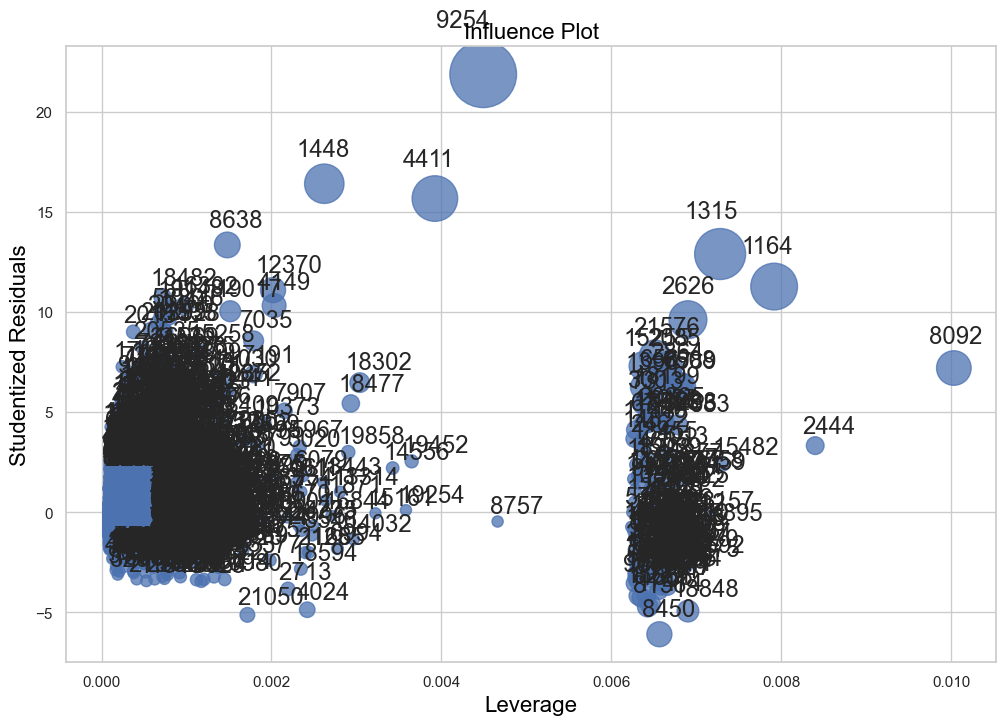

In [267]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')


It should be noted that index 9254 have large influence on data preidiction.

In [268]:
res

,y_price,price,error,sq_error
0,395283.245814,221900.0,173383.245814,3.006175e+10
1,681232.641247,538000.0,143232.641247,2.051559e+10
2,291448.912276,180000.0,111448.912276,1.242086e+10
3,494550.420108,604000.0,-109449.579892,1.197921e+10
4,521086.913200,510000.0,11086.913200,1.229196e+08
...,...,...,...,...
21608,434889.691309,360000.0,74889.691309,5.608466e+09
21609,546985.706350,400000.0,146985.706350,2.160480e+10
21610,254774.910083,402101.0,-147326.089917,2.170498e+10
21611,461602.015939,400000.0,61602.015939,3.794808e+09


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21607 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21607 non-null  int64  
 1   date           21607 non-null  object 
 2   price          21607 non-null  float64
 3   bedrooms       21607 non-null  int64  
 4   bathrooms      21607 non-null  float64
 5   sqft_living    21607 non-null  int64  
 6   sqft_lot       21607 non-null  int64  
 7   floors         21607 non-null  float64
 8   waterfront     21607 non-null  int64  
 9   view           21607 non-null  int64  
 10  condition      21607 non-null  int64  
 11  grade          21607 non-null  int64  
 12  sqft_above     21607 non-null  int64  
 13  sqft_basement  21607 non-null  int64  
 14  yr_built       21607 non-null  int64  
 15  yr_renovated   21607 non-null  int64  
 16  zipcode        21607 non-null  int64  
 17  lat            21607 non-null  float64
 18  long       

In [270]:
#Start to use 4 different modles to do the regression.
categorical_features = ['grade','waterfront','region','bedrooms']
numerical_features = ['sqft_living','yr_built']
target = 'price'

In [271]:
df[['grade','waterfront','region','sqft_living', 'yr_built', 'bedrooms']]

,grade,waterfront,region,sqft_living,yr_built,bedrooms
0,7,0,1,1180,1955,3
1,7,0,1,2570,1951,3
2,6,0,1,770,1933,2
3,7,0,1,1960,1965,4
4,8,0,1,1680,1987,3
...,...,...,...,...,...,...
21608,8,0,1,1530,2009,3
21609,8,0,1,2310,2014,4
21610,7,0,1,1020,2009,2
21611,8,0,1,1600,2004,3


In [272]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [273]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [274]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [275]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [276]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'waterfront',
                                                   'region', 'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'yr_built'])])),
                ('regressor', LinearRegression())])

In [277]:
pred = linear_regression.predict(X_test)
pred

array([260802.44246655, 529057.74930641, 165558.75744528, ...,
       558491.31712947, 903115.76158449, 517594.13780579])

In [278]:
from sklearn.metrics import mean_squared_error

In [279]:
np.sqrt(mean_squared_error(pred,y_test))

183417.5237910186

Ordinary Least Squares Regression: The mean squared error is 183417.5237910186

In [323]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=5))
])

In [324]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'waterfront',
                                                   'region', 'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'yr_built'])])),
                ('regressor', Ridge(alpha=5))])

In [325]:
pred_ridge = ridge_regression.predict(X_test)

In [326]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

182926.23140075456

Ridge: The mean squared error is 182926.23140075456

In [347]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=10))
])

In [348]:
lasso_regression.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748707333189.5625, tolerance: 204374556378.20966
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'waterfront',
                                                   'region', 'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'yr_built'])])),
                ('regressor', Lasso(alpha=10))])

In [349]:
lasso_pred = lasso_regression.predict(X_test)

In [350]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

183378.85211003709

LASSO: The mean squared error is 183378.85211003709

In [355]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=0.01, l1_ratio=0.8))
])

In [356]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'waterfront',
                                                   'region', 'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'yr_built'])])),
                ('regressor', ElasticNet(alpha=0.01, l1_ratio=0.8))])

In [357]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [358]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

184352.7131836466

Elastic Net: The mean squared error is 184352.7131836466

In [360]:
model_type = ['OLS', 'Ridge', 'LASSO', 'Elastic Net']
mse_values = [
    np.sqrt(mean_squared_error(pred, y_test)),
    np.sqrt(mean_squared_error(pred_ridge, y_test)),
    np.sqrt(mean_squared_error(lasso_pred, y_test)),
    np.sqrt(mean_squared_error(elasticnet_pred, y_test))
]
df_MSE = pd.DataFrame({'model type': model_type, 'RMSE': mse_values})

In [361]:
df_MSE

,model type,RMSE
0,OLS,183417.523791
1,Ridge,182926.231401
2,LASSO,183378.852110
3,Elastic Net,184352.713184


By changing the alpha for the three models, the list above shows best MSEs for each type of model. It is found that Ridge regression has the smallest MSE of 182926.231401 among the four types of models, indicating a more accurate prediction than the other three. 
The ridge model aims to have every attribute to be weighted and make the best weighted attribute combination to predict house prices. This means that the influence of each attribute will be considered in this model, making the predictions more precise.

In [362]:
coefficients = ridge_regression.named_steps['regressor'].coef_
feature_names = numerical_features

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

sqft_living: -53667.79797597912
yr_built: -83663.12692269949


In [363]:
coefficients = ridge_regression.named_steps['regressor'].coef_
feature_names = categorical_features

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

grade: -53667.79797597912
waterfront: -83663.12692269949
region: -261667.5009909535
bedrooms: -425507.7746075576


The coefficients seem not to be explainable. Therefore, the coefficients of OLS model will be applied to explain the impacts of each attributes.

In [364]:
results = ols("price ~ grade + sqft_living + yr_built + waterfront + region + bedrooms", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     8143.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:05:45   Log-Likelihood:            -2.9438e+05
No. Observations:               21607   AIC:                         5.888e+05
Df Residuals:                   21600   BIC:                         5.888e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.312e+06   1.02e+05     42.294      

Coefficient Analysis:

1. 'grade': 
Coefficient: 108700
This means that an increase of one unit in the 'grade' value will lead to an approximate increase of $108700 in housing prices. This indicates that houses with higher grades generally have higher prices.

2. 'sqft_living': 
Coefficient: 198.3355
This means that for every increase of one unit in the living area (in square feet), the housing price will increase by approximately $198. This suggests that larger living areas are typically associated with higher housing prices. Additionally, this may also be because the increase in the area of the house is particularly large, causing the coefficient to become smaller.

3. 'yr_built': 
Coefficient: -2565.7681
This means that for every additional year in the year of construction, the housing price will decrease by approximately $2565. This indicates that houses built in later years may be sold at lower prices, while older houses may be more attractive and have higher prices.
The reasons for higher prices of older houses may include their historical value, uniqueness, and the use of durable materials, which contribute to their rarity and appeal. Additionally, the cultural and aesthetic value associated with older houses can attract certain buyers, leading to higher selling prices. Conversely, lower prices for newer houses can be attributed to increased supply in the market due to new construction and advancements in building technology, making them more modern and efficient. As a result, newer houses may be priced lower to reflect their advanced features and designs.

4. 'waterfront': 
Coefficient: 751500
This means that houses with waterfront properties will have an increase in housing prices of approximately $751500. This suggests that houses with waterfront properties generally have higher prices.

5. 'region': 
Coefficient: 193000
This means that houses belonging to the region which lattitude > 47.5, will experience an increase in housing prices of approximately $193000. This indicates the region near Seattle & Lake Washington that may have higher housing prices, possibly due to attractiveness, convenience, or other factors.

6. 'bedrooms': 
Coefficient: -29780
This means that for every increase of one bedroom, the housing price will decrease by approximately $29780. This suggests that an increase in the number of bedrooms may have a negative impact on housing prices.
The negative coefficient may be caused by the fact that increasing the number of bedrooms can reduce the efficiency of space utilization, impacting the size and layout of other rooms. Furthermore, as family needs change, having fewer bedrooms may better align with current demands, accommodating shifts in household composition such as single individuals, nuclear families, or empty nesters. 

In summary, the main drivers of house prices in King City are the six attributes showed above. These factors have varying impacts on housing prices, with the grade, waterfront property, and region having the most significant influences.

In [365]:
#After analyzing the coefficients, it is also necessary to assess the accuracy of prediction for each attribute.

linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

pred = linear_regression.predict(X_test)

np.sqrt(mean_squared_error(pred,y_test))

183417.5237910186

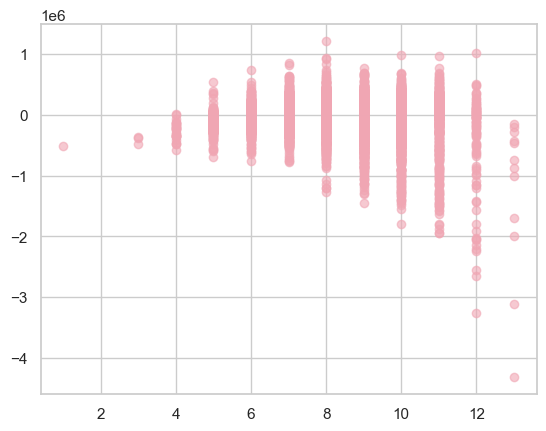

In [366]:
plt.scatter(df['grade'],res['error'],color='#F0A6B3',alpha=0.6)

The graph reveals that the accuracy of grade predictions is higher for lower grades (around 8 bedrooms or fewer). This observation can be attributed to the fact that houses with higher grades often exhibit more extreme values and outliers due to their luxurious status.

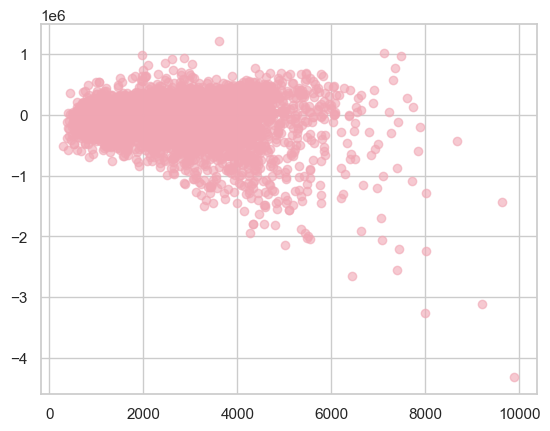

In [367]:
plt.scatter(df['sqft_living'],res['error'],color='#F0A6B3',alpha=0.6)

The graph indicates that the square footage of living space has more accurate predictions in smaller areas (around 3500 sqft or fewer) . This observation may also be attributed to the fact that houses with larger areas often exhibit more extreme values and outliers due to their luxurious nature.

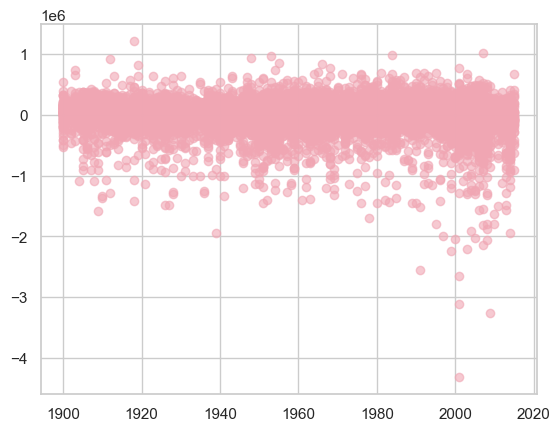

In [368]:
plt.scatter(df['yr_built'],res['error'],color='#F0A6B3',alpha=0.6)

The graph suggests that the accuracy of predictions for the year the house was built is higher for houses constructed before 1990. This observation may be attributed to the economic boom and technology advance that occurred after the year 1990, which could have led to greater variations in housing features and a decrease in prediction accuracy for houses built during that period.

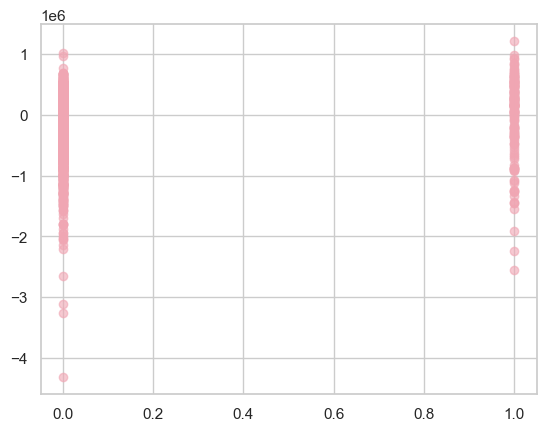

In [369]:
plt.scatter(df['waterfront'],res['error'],color='#F0A6B3',alpha=0.6)

In [ ]:
count_0 = df[df['waterfront'] == 0].shape[0]
count_1 = df[df['waterfront'] == 1].shape[0]
data = {'waterfront': [0, 1], 'frequency': [count_0, count_1]}
df_waterfront= pd.DataFrame(data)
df_waterfront

,waterfront,frequency
0,0,21447
1,1,163


It is observed that the predictions are more accurate when the waterfront variable has a value of 1, despite the majority of the data having waterfront as 0 (no waterfront).

It may imply that the waterfront variable has significant predictive power for the target variable. Even though waterfront is rare in the data, its presence has a meaningful impact on the predictions.

Furthermore, in the presence of waterfront, there may be distinct patterns or trends that are more strongly correlated with the target variable. The waterfront attribute may be associated with factors related to high prices or other target variables, resulting in more accurate predictions.

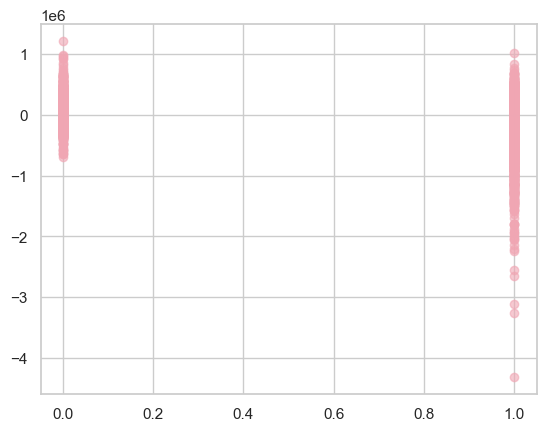

In [370]:
plt.scatter(df['region'],res['error'],color='#F0A6B3',alpha=0.6)

With regions where the latitude is greater than 47.5, there are more houses with luxury prices and outlier houses, which can also be observed on the aforementioned map graph. This is why the region with a value of 1 has lower prediction accuracy.

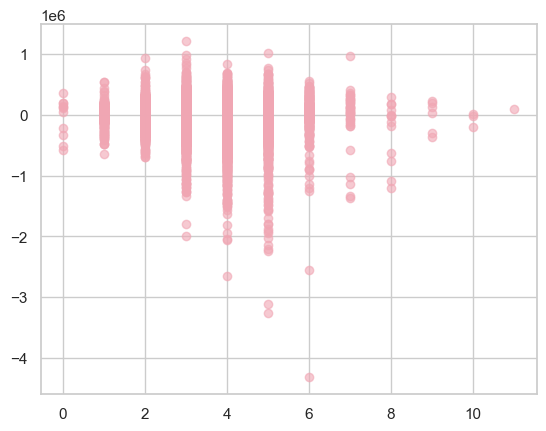

In [371]:
plt.scatter(df['bedrooms'],res['error'],color='#F0A6B3',alpha=0.6)

From the data distribution of 'bedrooms,' we can see that the accuracy is lower for houses with 3-6 bedrooms. This may be due to the presence of houses with medium to low sqft_living but a higher number of bedrooms, as well as houses with larger sqft_living but fewer bedrooms, which influence the price at a more complex level. This observation is also related to the utilization of space, as mentioned earlier in the coefficient analysis.